In [2]:
# load libraries
import numpy as np
import pandas as pd
from pandas import set_option

In [3]:
from pandas.plotting import scatter_matrix

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import KFold

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
from sklearn.metrics import accuracy_score

In [71]:
from sklearn.metrics import confusion_matrix

In [13]:
from sklearn import preprocessing

In [26]:
#Import a cleaned dataset
filename = "C:/Users/Intel/Desktop/UniversalBank.xlsx"
dataset = pd.read_excel(filename, sheet_name = "Data")

In [27]:
dataset.shape

(5000, 13)

In [28]:
"""
    Rows removed include:
        1. All the rows (52) with negative experience values
        2. A row with zip code having 4 digits
""" 
indexNames_Experience = dataset[dataset['Experience'] < 0].index
indexNames_ZIP_Code_Smaller = dataset[(dataset['ZIP Code'] < 10000)].index
indexNames_ZIP_Code_Bigger = dataset[(dataset['ZIP Code'] > 99999)].index

dataset.drop(indexNames_Experience, inplace = True)
dataset.drop(indexNames_ZIP_Code_Smaller, inplace = True)
dataset.drop(indexNames_ZIP_Code_Bigger, inplace = True)
dataset.shape

(4947, 13)

In [29]:
"""
    Zip codes are 6 digit integers. We bin these variables in 7 categories - zip codes between 90000 and 90999 in 1st, 
    91000 and 91999 in 2nd, ..., 96000 and 96999 in 7th.
    We create dummy variables with binary values for these 7 categories
    
    Family is a categorical variable from 1-4. We create 4 dummy variables for the same
"""
zip_code_new = {'90000':[], '91000':[], '92000':[], '93000':[], '94000':[], '95000':[], '96000':[]}
i = 0
while i<7000:
    for item in dataset['ZIP Code']:
        if 90000+i <= item < 91000+i:
            zip_code_new[str(90000+i)].append(1)
        else:
            zip_code_new[str(90000+i)].append(0)
    dataset['zip_code_new_'+str(90000+i)] = zip_code_new[str(90000+i)]
    i +=1000

family_new = {'1':[], '2':[], '3':[], '4':[]}
j = 0
while j<4:
    for item in dataset['Family']:
        if item == 1+j:
            family_new[str(j+1)].append(1)
        else:
            family_new[str(j+1)].append(0)
    dataset['family_new_'+str(j+1)] = family_new[str(j+1)]
    j +=1
del dataset['Family']
del dataset['ZIP Code']
dataset.head(10)

,ID,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,...,zip_code_new_91000,zip_code_new_92000,zip_code_new_93000,zip_code_new_94000,zip_code_new_95000,zip_code_new_96000,family_new_1,family_new_2,family_new_3,family_new_4
0,1,25,1,49,1.6,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,45,19,34,1.5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,39,15,11,1.0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,4,35,9,100,2.7,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,5,35,8,45,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,6,37,13,29,0.4,155,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6,7,53,27,72,1.5,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
7,8,50,24,22,0.3,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8,9,35,10,81,0.6,104,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,10,34,9,180,8.9,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4999
Data columns (total 22 columns):
ID                    4947 non-null int64
Age                   4947 non-null int64
Experience            4947 non-null int64
Income                4947 non-null int64
CCAvg                 4947 non-null float64
Mortgage              4947 non-null int64
Personal Loan         4947 non-null int64
Securities Account    4947 non-null int64
CD Account            4947 non-null int64
Online                4947 non-null int64
CreditCard            4947 non-null int64
zip_code_new_90000    4947 non-null int64
zip_code_new_91000    4947 non-null int64
zip_code_new_92000    4947 non-null int64
zip_code_new_93000    4947 non-null int64
zip_code_new_94000    4947 non-null int64
zip_code_new_95000    4947 non-null int64
zip_code_new_96000    4947 non-null int64
family_new_1          4947 non-null int64
family_new_2          4947 non-null int64
family_new_3          4947 non-null int64
family_ne

In [41]:
#Fetch number of rows and columns
dataset.shape

(4947, 22)

In [32]:
set_option('precision', 3)
dataset.describe()

,ID,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,...,zip_code_new_91000,zip_code_new_92000,zip_code_new_93000,zip_code_new_94000,zip_code_new_95000,zip_code_new_96000,family_new_1,family_new_2,family_new_3,family_new_4
count,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,...,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000
mean,2501.697,45.556,20.330,73.825,1.936,56.646,0.097,0.104,0.061,0.597,...,0.113,0.197,0.083,0.294,0.163,0.008,0.297,0.258,0.202,0.243
std,1443.110,11.322,11.313,46.111,1.748,101.836,0.296,0.306,0.239,0.491,...,0.317,0.398,0.276,0.456,0.370,0.090,0.457,0.437,0.402,0.429
min,1.000,24.000,0.000,8.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1255.500,36.000,10.500,39.000,0.700,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2498.000,46.000,20.000,64.000,1.500,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,3750.500,55.000,30.000,98.000,2.600,101.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000
max,5000.000,67.000,43.000,224.000,10.000,635.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [33]:
# correlation
dataset.corr(method="pearson")

,ID,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,...,zip_code_new_91000,zip_code_new_92000,zip_code_new_93000,zip_code_new_94000,zip_code_new_95000,zip_code_new_96000,family_new_1,family_new_2,family_new_3,family_new_4
ID,1.000,-9.654e-03,-9.285e-03,-0.018,-2.584e-02,-1.134e-02,-2.523e-02,-1.907e-02,-0.007,-0.001,...,0.004,-3.753e-02,2.329e-02,-0.010,1.559e-02,0.005,-0.003,1.942e-02,1.193e-02,-0.028
Age,-0.010,1.000e+00,9.941e-01,-0.058,-5.083e-02,-1.513e-02,-1.417e-02,5.290e-04,0.003,0.013,...,0.008,1.434e-02,1.150e-02,-0.009,-2.823e-02,-0.018,0.013,1.538e-02,3.393e-02,-0.062
Experience,-0.009,9.941e-01,1.000e+00,-0.049,-4.889e-02,-1.341e-02,-1.409e-02,-4.286e-04,0.005,0.013,...,0.007,1.530e-02,1.080e-02,-0.009,-2.875e-02,-0.017,0.018,2.033e-02,2.551e-02,-0.064
Income,-0.018,-5.790e-02,-4.916e-02,1.000,6.461e-01,2.068e-01,5.042e-01,-2.407e-03,0.170,0.015,...,0.016,-1.474e-03,-4.204e-03,-0.013,-7.219e-03,-0.019,0.067,1.325e-01,-7.391e-02,-0.138
CCAvg,-0.026,-5.083e-02,-4.889e-02,0.646,1.000e+00,1.098e-01,3.694e-01,1.243e-02,0.138,-0.003,...,0.016,-1.298e-04,3.725e-03,-0.004,-5.510e-03,-0.014,0.047,9.796e-02,-6.798e-02,-0.086
Mortgage,-0.011,-1.513e-02,-1.341e-02,0.207,1.098e-01,1.000e+00,1.423e-01,-3.756e-03,0.089,-0.007,...,0.007,-1.950e-04,1.637e-03,-0.018,2.022e-02,0.003,-0.007,4.416e-02,-1.416e-02,-0.024
Personal Loan,-0.025,-1.417e-02,-1.409e-02,0.504,3.694e-01,1.423e-01,1.000e+00,2.219e-02,0.316,0.006,...,0.002,-8.686e-04,7.475e-03,-0.005,2.958e-03,-0.007,-0.053,-2.751e-02,6.098e-02,0.028
Securities Account,-0.019,5.290e-04,-4.286e-04,-0.002,1.243e-02,-3.756e-03,2.219e-02,1.000e+00,0.319,0.016,...,-0.003,-2.651e-03,6.241e-05,0.012,-1.302e-02,0.006,-0.016,-1.339e-03,9.713e-04,0.018
CD Account,-0.007,3.286e-03,5.472e-03,0.170,1.376e-01,8.934e-02,3.158e-01,3.190e-01,1.000,0.177,...,-0.008,-1.584e-02,8.704e-03,0.024,-3.029e-03,0.015,-0.012,-2.080e-02,4.391e-02,-0.007
Online,-0.001,1.346e-02,1.345e-02,0.015,-3.359e-03,-6.662e-03,6.230e-03,1.616e-02,0.177,1.000,...,-0.002,-2.115e-02,7.556e-03,0.004,2.529e-02,0.010,0.005,-2.213e-02,7.668e-03,0.010


In [61]:
#dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
#dataset.plot(kind="density", subplots=True, layout=(5,5), sharex=False, legend=False, fontsize=1)
#dataset.plot(kind="box", subplots=True, layout=(5,5), sharex=False, sharey=False, fontsize=1)
#scatter_matrix(dataset)

In [34]:
# Create an array with all the values
array = dataset.values

In [36]:
"""
    Dropping ID column from the predictors' list as ID values can skew the data
    Dropping Personal Loan column as it is out target variable
"""
X = np.delete(array, [0,6], axis = 1)

In [37]:
"""
    Extracting outcome variable from the dataset
"""
Y = array[:,6]

In [38]:
"""
    Defining the test size of the data to be 25%
"""
test_size = 0.25
seed = 42

In [39]:
"""
    select 25% test data randomly and split
"""
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state= seed)

In [40]:
"""
    Defining number of folds to run the algorithm on the training data
"""
num_folds = 10

In [47]:
# defining scoring to be negative mean squared error as the function will search for the maximum
scoring = "neg_mean_squared_error"

In [42]:
# evaluate KNN Classifier because target variable is binary
model = KNeighborsClassifier()

In [45]:
# define Kfold
kfold = KFold(n_splits = num_folds, random_state = seed)

In [48]:
# Run KNN on non normalized data for kfolds=10
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
msg = "KNN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KNN: -0.092183 (0.006123)


In [51]:
# Define the scaler for Min-Max Normalization 
min_max_scaler = preprocessing.MinMaxScaler()

In [54]:
# fit the scalar wrt to training data
# standardize the tarining data using min_max_scaler
min_max_scaler.fit(X_train)
rescaledX_train = min_max_scaler.transform(X_train)
rescaledX_train[0]

array([0.65116279, 0.65116279, 0.21759259, 0.16      , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ])

In [62]:
#Define random k values for the model to run on
k_values = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])

In [56]:
param_grid = dict(n_neighbors= k_values)

In [57]:
model= KNeighborsClassifier()

In [58]:
kfold = KFold(n_splits = num_folds, random_state = seed)

In [61]:
#Run the model on normalized data using GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring= scoring, cv= kfold)
grid_result = grid.fit(rescaledX_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.085175 using {'n_neighbors': 3}


In [63]:
# display all means, stds and their corresponding k values
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

-0.086253 (0.015901) with {'n_neighbors': 1}
-0.085175 (0.017969) with {'n_neighbors': 3}
-0.087332 (0.012422) with {'n_neighbors': 5}
-0.087062 (0.012237) with {'n_neighbors': 7}
-0.090566 (0.012994) with {'n_neighbors': 9}
-0.091644 (0.013369) with {'n_neighbors': 11}
-0.093261 (0.012186) with {'n_neighbors': 13}
-0.093801 (0.012162) with {'n_neighbors': 15}
-0.093801 (0.012162) with {'n_neighbors': 17}
-0.094070 (0.011960) with {'n_neighbors': 19}
-0.094070 (0.011960) with {'n_neighbors': 21}


Text(0, 0.5, 'Error')

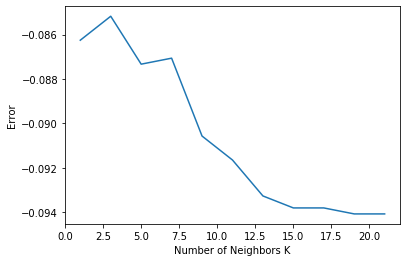

In [64]:
# plot
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Error")

In [65]:
# Normalize test data using min_max_scaler developed from train data
X_test_min_max = min_max_scaler.transform(X_test)
print(X_test_min_max)

[[0.76744186 0.74418605 0.07407407 ... 0.         0.         0.        ]
 [0.86046512 0.81395349 0.24074074 ... 0.         1.         0.        ]
 [0.76744186 0.74418605 0.72685185 ... 0.         0.         1.        ]
 ...
 [0.13953488 0.13953488 0.15740741 ... 0.         0.         0.        ]
 [0.60465116 0.58139535 0.02314815 ... 1.         0.         0.        ]
 [0.39534884 0.39534884 0.25462963 ... 1.         0.         0.        ]]


In [96]:
# Develop KNN model for k=3 (best k-value)
testKNN = KNeighborsClassifier(n_neighbors=3)

# Train it using rescaled X_train
testKNN.fit(rescaledX_train, Y_train)

# Run the trained model on rescaled X_test data to predict Y
pred = testKNN.predict(X_test_min_max)

# Measure the accuracy of the prediction
print("Accuracy of the model: %f" % accuracy_score(Y_test, pred))

#Confusion matrix
print("Confusion matrix: \n %s" % confusion_matrix(Y_test, pred))
tn, fp, fn, tp = confusion_matrix(Y_test, pred).ravel()
print("TN, FP, FN, TP -> %s" % tn, fp, fn, tp)

Accuracy of the model: 0.912692
Confusion matrix: 
 [[1084   27]
 [  81   45]]
TN, FP, FN, TP -> 1084 27 81 45


In [69]:
# Normalize the observation data using min_max_scaler developed from train data
new_data_min_max = min_max_scaler.transform([[40, 10, 84, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

# Develop KNN model for k=1
testKNN = KNeighborsClassifier(n_neighbors=1)

# Train the model using rescaled X_train
testKNN.fit(rescaledX_train, Y_train)

# Run the trained model on rescaled X_test data to predict if the person will opt for 'Personal loan'
testKNN.predict(new_data_min_max)

array([0.])



Citation





/**
* This was adapted from lecture notes from Professor Gerhard Trippen on 20191016
* lecture here:
* https://rac.rotman.utoronto.ca
[…]
*/



/**
* This was adapted from a post from Kevin Zakka on 20160713 to Github
* blog here:
* https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/?fbclid=IwAR1qlNe7T1y_OjvOAXrDCWHzO_h1y17Gb49AZYEjLWo0b6NmPQ5Zw_C0pGo
[…]
*/
